# BlockChain
##### This tool helps the users to determine the right time to purchase bitcoins .. It Correlates the trade volume and price and give a visualization
##### This tool also helps the usess to identify the major bitcoin platform based on the market cap owned by each provider


### Step 1
#### The First Step in the process is to capture the data.
####  The data source for the project is https://www.blockchain.com/ 's api. Past 3 years data till now is captured  for the project

In [113]:
# Define Data Apis
Price_URL = 'https://blockchain.info/charts/market-price?timespan=1095days&format=json'
Trade_Volume_URL ='https://api.blockchain.info/charts/trade-volume?timespan=1095days&format=json'


In [114]:
import json
import objectpath
from datetime import datetime

trade_data = json.loads(requests.get(Trade_Volume_URL).text)
jsonnn_tree = objectpath.Tree(trade_data)
trade_volume = list(jsonnn_tree.execute('$..y'))
#print(trade_volume)

price_data = json.loads(requests.get(Price_URL).text)
jsonnn_tree = objectpath.Tree(price_data)
time_series = list(jsonnn_tree.execute('$..x'))

price = list(jsonnn_tree.execute('$..y'))
#print(price)

time_series=[ datetime.fromtimestamp(timestamp).strftime("%Y-%m-%d") for timestamp in time_series]
#print(time_series)
 

In [115]:
#Export The Data to CSV

import csv
from itertools import zip_longest

d = [time_series, price]
export_data = zip_longest(*d, fillvalue = '')
with open('price.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Date", "Price"))
      wr.writerows(export_data)
myfile.close()

d = [time_series,trade_volume]
export_data = zip_longest(*d, fillvalue = '')
with open('tradevolume.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Date", "volume"))
      wr.writerows(export_data)
myfile.close()

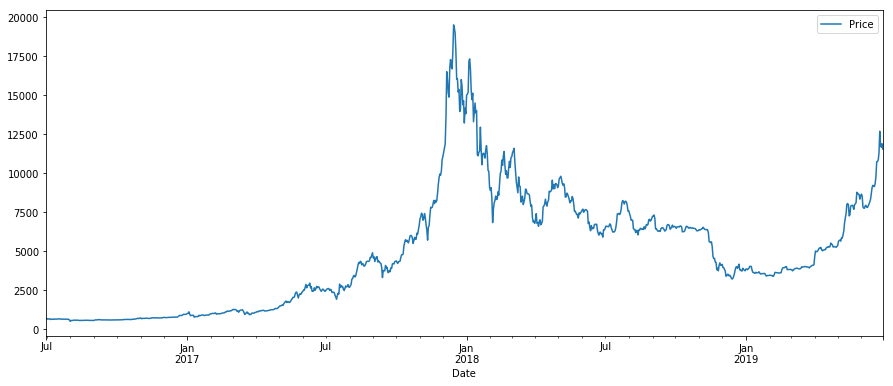

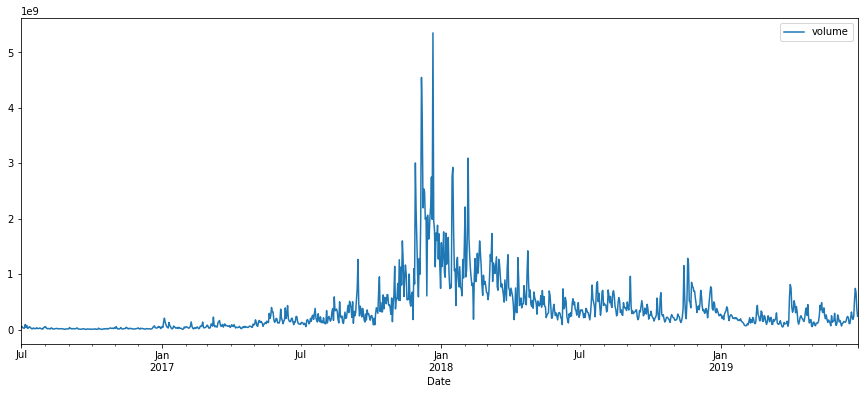

In [121]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('price.csv')
df = pd.DataFrame(data, columns = ['Date', 'Price'])

# Set the Date as Index
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']


df.plot(figsize=(15, 6))
plt.show()


data = pd.read_csv('tradevolume.csv')
df = pd.DataFrame(data, columns = ['Date', 'volume'])

# Set the Date as Index
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']


df.plot(figsize=(15, 6))
plt.show()